# Information

In [35]:
#Information of an event A where P[A]>0
#Information function i_x(x) of a random variable x, 
#will be calculated with same function where p represents the probability mass distribution of the rv x
import math
def getInformation(p):
  if p>0:
    return math.log2(1/p)
  if p ==1:
    return 0
  return float('inf')

# Entropy

In [36]:
#Entropy, expectation of the information function
#param l represents the list of the probabilities of each states
def getEntropy(l):
  h = 0
  for i in range(len(l)):
    if (getInformation(l[i])) != float('inf'): #0*inf = nan in Python, unfortunately
      h += l[i]*getInformation(l[i])
  return h


# Nominal Information

In [37]:
def getNominalInformation(l):
  return [getEntropy(l)/(math.log2(len(l))), (1-getEntropy(l)/(math.log2(len(l))))] #returns nominal information(efficiency) and redundancy

# Expected Value

In [71]:
def getExpectedValue(l):
  expected_value = 0
  for i in range(len(l)):
    expected_value += l[i]*i
  return expected_value

## Example of Entropy Calculation with Equal Probabilites

As an example, if we have a dice, our sample space is S = {1,2,3,4,5,6} where the result of rolling a dice can be. Each state has equal probabilities = 1/6. In that case, our l = { 1/6, 1/6, 1/6, 1/6, 1/6, 1/6}


In [38]:
dice_example = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
getEntropy(dice_example)

2.584962500721156

Proposition (upper bound)
Let x be a rv with a finite alphabet of M values
1. If all a ∈ Ax are equally likely with probability px(a) = 1/M, then H(x) = log2 M.
2. Otherwise, H(x) < log2 M.



In [39]:
#Entropy upper bound for the events with same probabilities
math.log2(6) == getEntropy(dice_example)

True

## Entropy calculation binary example

Text(0.5, 1.0, 'Entropy vs Probability of an event')

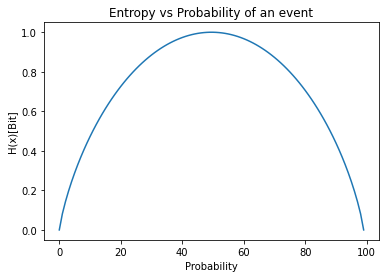

In [40]:
import numpy as np
from matplotlib import pyplot as plt
prob_values = np.linspace(0,1,100) #sampling 100 values in range [0.01,0.99] since entropy of an event which has P(event)=0 or P(event)=1 ~0 since the event is not informative
prob_list = []
for i in range(len(prob_values)):
  prob_list.append([prob_values[i], 1-prob_values[i]])
  
h_values_toPlot = []

for i in range(len(prob_list)):
  h_values_toPlot.append(getEntropy(prob_list[i]))
  #print(i, getEntropy(prob_list[i]))

plt.plot(h_values_toPlot)
plt.xlabel("Probability")
plt.ylabel("H(x)[Bit]")
plt.title("Entropy vs Probability of an event")


Assuming a random variable x, has probability distiribution over N values, a represents the list of probabilities of each x =  	α.



In [41]:
import random

length = 1000
a = np.random.random(length)  
a = a/np.sum(a, axis=0) * 1  # force them to sum to totals
print(sum(a))
print(a.shape)

if (sum(a)> 1):
  max_elmnt_index = np.argmax(a)
  print(max(a), a[max_elmnt_index]) #debug
  a[max_elmnt_index] = a[max_elmnt_index] - (sum(a)-1)
  print("Fixed sum:",sum(a))
elif (sum(a)< 1):
  min_elmnt_index = np.argmin(a)
  print(min(a), a[min_elmnt_index]) #debug
  a[min_elmnt_index] = a[min_elmnt_index] + (1-sum(a))
  print("Fixed sum:",sum(a))

0.9999999999999989
(1000,)
6.05949120209384e-06 6.05949120209384e-06
Fixed sum: 1.0


In [42]:
print(type(a))
print(a.shape)

<class 'numpy.ndarray'>
(1000,)


In [43]:
nominal_inf,redundancy = getNominalInformation(a)
print("Efficiency of set a",nominal_inf )
print("Redundancy of set a",redundancy )

Efficiency of set a 0.9745584609459762
Redundancy of set a 0.0254415390540238


# Guessing Entropy

In [53]:
from math import log2
def getGuessingEntropy(l):
  inf_list = []
  for i in range(len(l)):
    inf_list.append(getInformation(l[i]))
  h_min = min(inf_list)

  log_max = math.log2(1/max(l))

  print("Minimum of its information function = ", h_min)
  print("Log of the probability of its most likely value = ", log_max)
  print("h_min == log_max:", (h_min == log_max))
  return h_min

In [54]:
getGuessingEntropy(a)

Minimum of its information function =  9.006257397086083
Log of the probability of its most likely value =  9.006257397086083
h_min == log_max: True


9.006257397086083

# Collision Entropy

In [46]:
def getCollisionEntropy(l):
  result = 0
  for i in range(len(l)):
    result+=(l[i])**2
  return result

In [47]:
getCollisionEntropy(a)

0.0013038044685706857

# Rényi Entropy

In [57]:
def getRenyiEntropy(order,l):
  if order == 0:
    return math.log2(len(l))
  if order == 1:
    return getEntropy(l)
  if order == 2:
    return getCollisionEntropy(l)
  return getGuessingEntropy(l)

In [58]:
print("Heartler (or max-) Entropy", getRenyiEntropy(0,a))
print("Standard (Shannon) Entropy", getRenyiEntropy(1,a))
print("Collision Entropy", getRenyiEntropy(2,a))
print("Guessing Entropy", getRenyiEntropy(float("inf"),a))
print("Upper bound ~ log_2 (M)", log2(len(a)))

Heartler (or max-) Entropy 9.965784284662087
Standard (Shannon) Entropy 9.71223939457988
Collision Entropy 0.0013038044685706857
Minimum of its information function =  9.006257397086083
Log of the probability of its most likely value =  9.006257397086083
h_min == log_max: True
Guessing Entropy 9.006257397086083
Upper bound ~ log_2 (M) 9.965784284662087


# Joint Probability 

In [90]:
#Joint probability of independent events
def getJointProbability(alpha,beta):
  return alpha*beta

Let x and y are two i.i.d random variables 

In [59]:
import pandas as pd
import seaborn as sns

In [60]:
#Given the length of a space, this function creates random probability distributions
def createPMD(length):
  a = np.random.random(length)  
  a = a/np.sum(a, axis=0) * 1  # force them to sum to totals
  if (sum(a)> 1):
    max_elmnt_index = np.argmax(a)
    print(max(a), a[max_elmnt_index]) #debug
    a[max_elmnt_index] = a[max_elmnt_index] - (sum(a)-1)
  elif (sum(a)< 1):
    min_elmnt_index = np.argmin(a)
    print(min(a), a[min_elmnt_index]) #debug
    a[min_elmnt_index] = a[min_elmnt_index] + (1-sum(a))
  return a

In [72]:
n = 1000
x = createPMD(n)
y = createPMD(n)


1.8751588689377325e-06 1.8751588689377325e-06
0.002060451157148672 0.002060451157148672


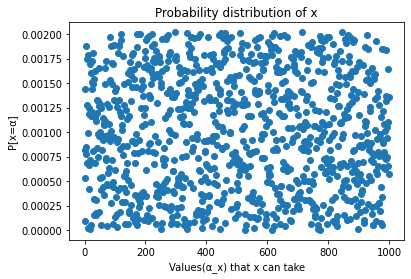

In [73]:
plt.plot([i for i in range(n)],x,'o')
plt.xlabel("Values(α_x) that x can take")
plt.ylabel("P[x=α]")
plt.title("Probability distribution of x")
plt.show()

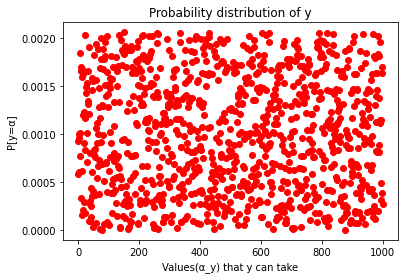

In [76]:
plt.plot([i for i in range(n)],y,'ro')
plt.xlabel("Values(α_y) that y can take")
plt.ylabel("P[y=α]")
plt.title("Probability distribution of y")
plt.show()

## Marginal Distribution

In [102]:
def getMarginalDistribution(alpha, l):
  result = 0
  for i in range(len(l)):
    result+=getJointProbability(alpha,l[i])
  return result

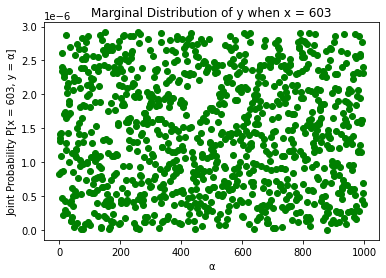

Marginal Distribution 0.0014154217561433767


In [103]:
x_index = random.randint(0,n)
joint_prob = []
for i in range(len(y)):
  joint_prob.append(getJointProbability(x[x_index],y[i]))
plt.plot(joint_prob,"go")
plt.xlabel("α")
plt.ylabel("Joint Probability P[x = {}, y = α]".format(x_index))
plt.title("Marginal Distribution of y when x = {}".format(x_index))
plt.show()

print("Marginal Distribution",getMarginalDistribution(x[x_index],y))

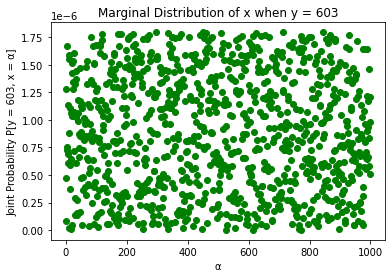

Marginal Distribution 0.000889769762680946


In [104]:
joint_prob = []
for i in range(len(y)):
  joint_prob.append(getJointProbability(y[x_index],x[i]))
plt.plot(joint_prob,"go")
plt.xlabel("α")
plt.ylabel("Joint Probability P[y = {}, x = α]".format(x_index))
plt.title("Marginal Distribution of x when y = {}".format(x_index))
plt.show()

print("Marginal Distribution",getMarginalDistribution(y[x_index],x))

# Conditional Probability

In [118]:
def getConditionalProbability(alpha,beta):
  joint_prob = getJointProbability(alpha,beta)
  cond_prob = joint_prob/beta
  return cond_prob


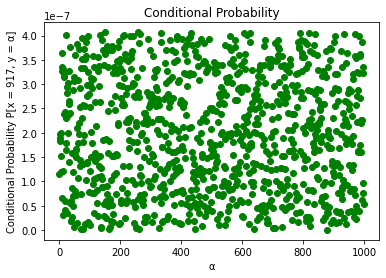

In [99]:
x_index = random.randint(0,n)
conditional_prob = []
for i in range(len(y)):
  conditional_prob.append(getConditionalProbability(x[x_index],y[i]))
plt.plot(joint_prob,"go")
plt.xlabel("α")
plt.ylabel("Conditional Probability P[x = {}, y = α]".format(x_index))
plt.title("Conditional Probability")
plt.show()

# Joint Information

In [147]:
def getJointInformation(alpha, beta): #where alpha = px(a) and beta = px(b
  print(getConditionalProbability(alpha,beta))
  return log2(1/getConditionalProbability(alpha,beta)) - log2(1/beta)

# Joint Entropy

In [107]:
def getJointEntropy(x,y):
  result = 0
  for i in x:
    for j in y:
      result+= getJointProbability(i,j) * log2(1/getJointProbability(i,j))
  return result

In [112]:
print("Entropy of x:", getEntropy(x))
print("Entropy of y:", getEntropy(y))
print("max{H(x),H(y)}",max(getEntropy(x),getEntropy(y)) )
print("Joint entropy",getJointEntropy(x,y))
print("H(x) + H(y) = ", getEntropy(x)+getEntropy(y)) 
# if x&y are statistically independent,
# H(x,y) = H(x)+H(y)
# Otherwise, H(x,y) < H(x) + H(y)

Entropy of x: 9.677365180164369
Entropy of y: 9.673036985694896
max{H(x),H(y)} 9.677365180164369
Joint entropy 19.350402165860316
H(x) + H(y) =  19.350402165859265


# Conditional Information

In [113]:
def getConditionalInformation(alpha,beta):
  return log2(1/getConditionalProbability(alpha,beta))

# Conditional Entropy

In [134]:
def getConditionalEntropy(x,y):
  result = 0
  for i in x:
    for j in y:
      result += getConditionalProbability(i,j)*log2(1/getJointProbability(i,j))
  return result

In [128]:
random_index_x = random.randint(0,n)
random_index_y = random.randint(0,n)
print("Conditional Information = {} when x = {}, and y = {}".format(getConditionalInformation(x[random_index_x],y[random_index_y]),random_index_x,random_index_y))
print("Joint distribution ix(a, b):", getJointInformation(x[random_index_x],y[random_index_y]))
print("Information of y:", getInformation(y[random_index_y]))
print("i_x|y(a|b) = i_x(a, b) − i_y(b) :" )
print((getJointInformation(x[random_index_x],y[random_index_y])-getInformation(y[random_index_y]))==getConditionalInformation(x[random_index_x],y[random_index_y]))

Conditional Information = 9.929502218981304 when x = 276, and y = 106
Joint distribution ix(a, b): 19.33328245483505
Information of y: 9.403780235853747
i_x|y(a|b) = i_x(a, b) − i_y(b) :
True


In [148]:
print(getJointInformation(1/6,1/6))
print((1/6)/getConditionalProbability(1/6,1/6))

0.16666666666666666
0.0
1.0


In [146]:
print("Conditional Entropy:", getConditionalEntropy(x, y))
print("Joint Entropy:", getJointEntropy(x,y))
print("Entopy of x:", getEntropy(x))

print(getConditionalProbability(x[0],y[0]))
print(log2(1/getJointProbability(x[0],y[0])))

Conditional Entropy: 20096.166448303407
Joint Entropy: 19.350402165860316
Entopy of x: 9.677365180164369
0.0014352558348722135
20.188416047702187


# Cross Entropy

In [152]:
def getCrossEntropy(x,y):
  result = 0
  for i in range(len(x)):
    result+=x[i]*getInformation(y[i])
  return result

Binary Example

In [155]:
bx = [0.6,0.4]
by = [0.5,0.5]
print(getCrossEntropy(bx,by))
#0.6*log2(1/0.5) + 0.4*log2(1/0.5)
#print(0.6*log2(1/0.5))
#print(0.4*log2(1/0.5))

1.0
0.6
0.4


# Kullback-Leibler Divergence

In [157]:
def getKLD(x,y):
  result = 0
  for i in range(len(x)):
    result+=x[i]*log2(x[i]/y[i])
  return result

Binary Example

In [160]:
bx = [0.6,0.4]
by = [0.5,0.5]
print(getKLD(bx,by))
#0.6*log2(0.6/0.5) + 0.4*log2(0.4/0.5)
print(0.6*log2(0.6/0.5))
print(0.4*log2(0.4/0.5))
print(0.6*log2(0.6/0.5) + 0.4*log2(0.4/0.5))

0.029049405545331364
0.15782064350027628
-0.1287712379549449
0.029049405545331364


## Positivity Property 

D ($p_{x}$ || $p_{y}$) ≥ 0, ∀ $p_{x}$, $p_{y}$, and D ($p_{x}$ || $p_{y}$) = 0 if and only if $p_{x}$ ≡ $p_{y}$

Binary Example

In [161]:
bx = [0.5,0.5]
by = [0.5,0.5]
print(getKLD(bx,by))
#0.5*log2(0.5/0.5) + 0.5*log2(0.5/0.5) ~ log (a/a =1) = 0 anyways
print(0.5*log2(0.5/0.5))
print(0.5*log2(0.5/0.5))
print(0.5*log2(0.5/0.5) + 0.5*log2(0.5/0.5))

0.0
0.0
0.0
0.0


## Asymmetry Property

D ($p_{x}$ || $p_{y}$) ≠ D ($p_{y}$ || $p_{x}$)

unless $p_{x}$ ≡ $p_{y}$

In [163]:
print("D ( 𝑝𝑥 || 𝑝𝑦 ) = ", getKLD(x,y))
print("D ( 𝑝y || 𝑝x ) = ", getKLD(y,x))

D ( 𝑝𝑥 || 𝑝𝑦 ) =  0.7449969033206721
D ( 𝑝y || 𝑝x ) =  0.7602130476807758


## Relation with Entropy

If x, y are discrete and y ∼ U($A_{x}$), 

D ($p_{x}$ || $p_{y}$) = H(y) − H(x).

In [173]:
z = [1/n for i in range(n)]
print("KLD(px,pz) = {} where z ∼ U( 𝐴𝑥 )".format(getKLD(x,z)))
print("H(z) − H(x) = ", getEntropy(z) - getEntropy(x))


KLD(px,pz) = 0.2884191044977207 where z ∼ U( 𝐴𝑥 )
H(z) − H(x) =  0.28841910449764896


## Relation with Cross Entropy

If x, y are discrete, 

D ($p_{x}$ || $p_{y}$) = H($p_{x}$ ; $p_{y}$) - H(x).

In [174]:
print("KLD(px,py)",getKLD(x,y))
print("(Cross Entropy = {}) - (Entropy of x ={}) = {}".format(
    getCrossEntropy(x,y),
    getEntropy(x),
    (getCrossEntropy(x,y) - getEntropy(x))))


KLD(px,py) 0.7449969033206721
(Cross Entropy = 10.42236208348505) - (Entropy of x =9.677365180164369) = 0.7449969033206809


## Relation with Mutual Information

# Create Data

In [216]:
import random 

K = 4
#works only for 7,4

def encode(s):
    # Read in K=4 bits at a time and write out those plus parity bits
    while len(s) >= K:
        nibble = s[0:K]
        #print(hamming(nibble))
        s = s[K:]
    return hamming(nibble)

def hamming(bits):
    # Return given 4 bits plus parity bits for bits (1,2,3), (2,3,4) and (1,3,4)
    t1 = parity(bits, [0,1,3])
    t2 = parity(bits, [0,2,3])
    t3 = parity(bits, [1,2,3])
    return bits + t1 + t2 + t3  #again saying, works only for 7,4

def parity(s, indicies):
    # Compute the parity bit for the given string s and indicies
    sub = ""
    for i in indicies:
        sub += s[i]
    return str(str.count(sub, "1") % 2)

In [238]:
def generateAllBinaryStrings(n):
    i = 0
    a = []
    while(i<2**n):
      a.append(bin(i)[2:].zfill(n))
      i+=1
    return a
    

In [246]:
n_bits = 4
msg_space = generateAllBinaryStrings(n_bits)
ciphers =[]

for i in msg_space:
  h = encode(i)
  k = ''
  for j in range(0, len(h)):      #calculate binary complement
        if(h[j]=='0'):
            k = k + '1'
        if(h[j]=='1'):
            k = k + '0'
  rn = random.randint(0, 1)      #random value equal to 0 or 1
  cipher = ''
  if(rn == 0):         #set x equal to encoded text or its complement with probability 50%
      cipher = h
  else:
      cipher = k
  ciphers.append(cipher)

In [247]:
data_set = {"u":msg_space, "x":ciphers}
df = pd.DataFrame(data_set)
df

,u,x
0,0000,1111111
1,0001,1110000
2,0010,0010011
3,0011,0011100
4,0100,0100101
5,0101,1010101
6,0110,1001001
7,0111,1000110
8,1000,0111001
9,1001,1001001


In [259]:
#p_u = (1/len(df))*[1]
df["p_u"] = 1/len(df) #uniform distribution
x_dict = dict()
for i in range(len(df)):
  if df.x.iloc[i] in x_dict:
    x_dict[df.x.iloc[i]] +=1/len(df)
  else:
    x_dict[df.x.iloc[i]] =1/len(df)
x_dict

{'0000000': 0.0625,
 '0010011': 0.0625,
 '0011100': 0.125,
 '0100101': 0.125,
 '0111001': 0.0625,
 '1000110': 0.0625,
 '1001001': 0.125,
 '1010101': 0.125,
 '1101100': 0.0625,
 '1110000': 0.125,
 '1111111': 0.0625}

In [261]:
p_x = []
for i in range(len(df)):
  p_x.append(x_dict[df.x.iloc[i]])
df["p_x"] = p_x
df

,u,x,p_u,p_x
0,0000,1111111,0.0625,0.0625
1,0001,1110000,0.0625,0.1250
2,0010,0010011,0.0625,0.0625
3,0011,0011100,0.0625,0.1250
4,0100,0100101,0.0625,0.1250
5,0101,1010101,0.0625,0.1250
6,0110,1001001,0.0625,0.1250
7,0111,1000110,0.0625,0.0625
8,1000,0111001,0.0625,0.0625
9,1001,1001001,0.0625,0.1250


In [267]:
p_cond = [] 
p_joint = []
i_u = []
i_x = []
i_cond = []
i_joint = []
h_u = []
h_x = []
h_joint = []
h_cond = []
h_cross = []
kld_xy = []
for i in range(len(df)):
  p_cond.append(getConditionalProbability(df.p_u.iloc[i],df.p_x.iloc[i]))
  p_joint.append(getJointProbability(df.p_u.iloc[i],df.p_x.iloc[i]))
  i_u.append(getInformation(df.p_u.iloc[i]))
  i_x.append(getInformation(df.p_x.iloc[i]))
  i_cond.append(getConditionalInformation(df.p_u.iloc[i],df.p_x.iloc[i]))
  i_joint.append(getJointInformation(df.p_u.iloc[i],df.p_x.iloc[i]))


df["p_cond"] = p_cond
df["p_joint"] = p_joint
df["i_u"] = i_u
df["i_x"] = i_x
df["i_cond"] = i_cond
df["i_joint"] = i_joint
df

0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625


,u,x,p_u,p_x,p_cond,p_joint,i_u,i_x,i_cond,i_joint
0,0000,1111111,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
1,0001,1110000,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
2,0010,0010011,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
3,0011,0011100,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
4,0100,0100101,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
5,0101,1010101,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
6,0110,1001001,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
7,0111,1000110,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
8,1000,0111001,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
9,1001,1001001,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
